<a href="https://colab.research.google.com/github/Emanuel-Baisire/DeepLearningTutorials/blob/master/MLRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Resources:

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7277980/#:~:text=Our%20deep%20learning%2Dbased%20model,a%20server%2Dbacked%20web%20application.

# https://www.analyticsvidhya.com/blog/2021/10/deep-learning-based-malaria-detection-model-for-beginners/

# https://towardsdatascience.com/detecting-malaria-with-deep-learning-9e45c1e34b60

# https://www.kaggle.com/code/thanatoz/malaria-detection/notebook


# Let's build one more model with higher complexity

# Clearing backend

from tensorflow.keras import backend

backend.clear_session()


# Mounting the drive

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Extract zip file to the local environment unzip command

# Useful resource: https://towardsdatascience.com/how-to-successfully-add-large-data-sets-to-google-drive-130beb320f1a


!unzip gdrive/My\ Drive/malaria/cell_images.zip



Streaming output truncated to the last 5000 lines.
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144001_cell_44.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144001_cell_63.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144001_cell_72.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144001_cell_84.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144143_cell_1.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144143_cell_119.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144143_cell_132.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144143_cell_170.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144143_cell_185.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144143_cell_190.png  
 extracting: cell_images/train/uninfected/C218ThinF_IMG_20151106_144143_cell_192.png 

In [3]:
# Importing Libraries required

import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [4]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'


In [5]:
# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder

for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [7]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder

for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [8]:
# Checking the shape of train and test labels

# Shape of test and tran image

print("Shape:", train_images.shape)

print()


print("Shape:", test_images.shape)

print()

#print("First image:\n", test_images[0])

print("Shape:", train_labels.shape)

print()

print("Shape:", test_labels.shape)

print()

Shape: (24958, 64, 64, 3)

Shape: (2600, 64, 64, 3)

Shape: (24958,)

Shape: (2600,)



**Observations:**
There are 24958 images in the training dataset and 2600 images in testing data.The data shape is 64 images of height and width 64 and three colored RGB channels.

In [9]:
# Check the minimum and maximum range of pixel values for train and test images

import numpy as np

# Train size

min_images = train_images.min()
max_images = train_images.max()
print(min_images, max_images)


0 255


In [10]:
# Test size

min_images = test_images.min()
max_images = test_images.max()
print(min_images, max_images)

0 255


**Observations and Insights**
Both test and train images have pixel values ranging from 0 to 255. There is a need to normalize due to computational price to be paid if we fed the data as it is in a Deep Neural Network.The next step will be to normalize the value with a range of 0 to 1.


In [11]:
# Count the number of values in both uninfected and parasitized

# Number of Training data with parasite vs uninfected

parasite_train= []
uninfected_train = []

for i in train_labels:
  if i == 1:
    parasite_train.append(i)

else:
  uninfected_train.append(i)



parasite_train = pd.DataFrame(parasite_train)
parasite_train.value_counts()

uninfected_train = pd.DataFrame(uninfected_train)
uninfected_train.value_counts()

print(parasite_train.value_counts())

1    12582
dtype: int64


In [12]:
# # Number of Testing data with parasite vs uninfected

parasite_test= []
uninfected_test = []

for i in test_labels:
  if i == 1:
    parasite_test.append(i)

else:
  uninfected_test.append(i)



parasite_test = pd.DataFrame(parasite_test)
parasite_test.value_counts()

uninfected_test = pd.DataFrame(uninfected_test)
uninfected_test.value_counts()


# Print parasitic test and train data
print('Number of train labels identified with parasites:',parasite_train.value_counts())

print('Number of test labels identified with parasites:',parasite_test.value_counts())


Number of train labels identified with parasites: 1    12582
dtype: int64
Number of test labels identified with parasites: 1    1300
dtype: int64


**Observations and Insight**

Number of parasitic images in train label dataset is 12582 and the rest are uninfected.

Number of parasitic images in test label dataset is   1300 and the rest are uninfected.

In [13]:

# Clearing backend

from tensorflow.keras import backend

backend.clear_session()



# Normalize train and test images by dividing it by 255 and convert them to float32 using astype function

train_images = (train_images/ 255).astype('float32') 

test_images = (test_images/255).astype('float32')

print(test_images.max())

#test_images.min()

#test_images.max()

print(train_images.min(), '- ',train_images.max())

print()

print(test_images.min(), '- ',test_images.max())

print()


1.0
0.0 -  1.0

0.0 -  1.0



**Observations and insights:**
Both train and test images have been normalized with a value range between 0 and 1. This step helps in reducing the computational efforts needed to feed inputs to the proposed Deep Neural Network

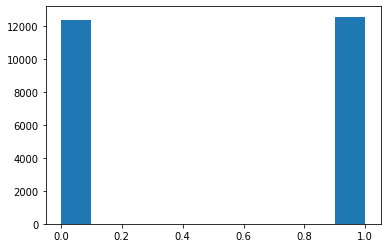

In [14]:
# Plot to check if the data is balanced

# # You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train
# and test data and check if they are balanced

plt.hist(train_labels);

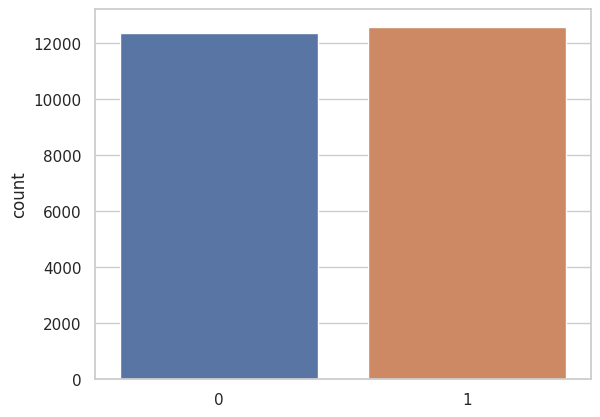

In [40]:
# Plot to check if the train and test data labels are balanced

# Checking for Train data balance

import numpy as np
import matplotlib.pyplot as plt
 
  
import seaborn as sns
sns.set_theme(style="whitegrid")

x = test_labels
sns.countplot(x=train_labels);

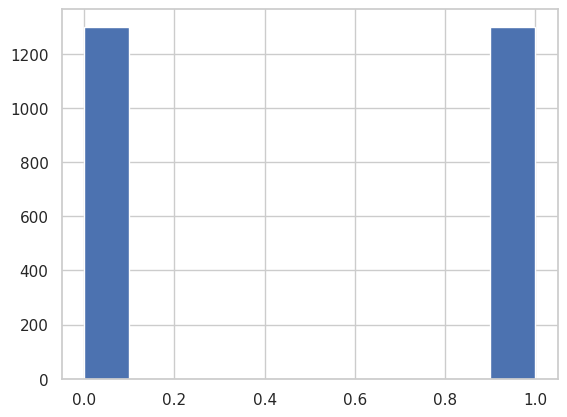

In [39]:
# # Checking for Test data balance

plt.hist(test_labels);

**Observations and Insights**

Both Parasite and uninfected labels are balanced for both train and data labels.

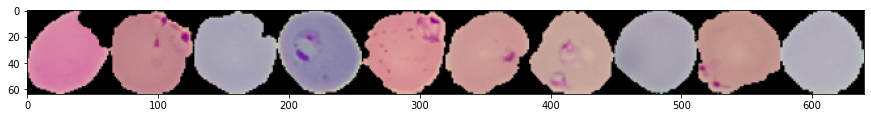

In [ ]:
# Data Exploration for training images


np.random.seed(10)

concat_img = None
for i in range(10):
    idx = np.random.randint(train_images.shape[0])
    if concat_img is None:
        concat_img = train_images[idx]
    else:
        concat_img = np.concatenate([concat_img, train_images[idx]], axis=1)
plt.figure(figsize=(15, 5)) 
plt.imshow(concat_img);

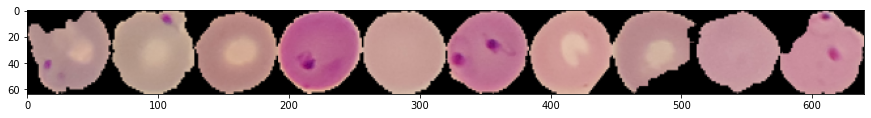

In [ ]:
# # Data Exploration for test images

np.random.seed(10)

concat_img = None
for i in range(10):
    idx = np.random.randint(test_images.shape[0])
    if concat_img is None:
        concat_img = test_images[idx]
    else:
        concat_img = np.concatenate([concat_img, test_images[idx]], axis=1)
plt.figure(figsize=(15, 5)) 
plt.imshow(concat_img);

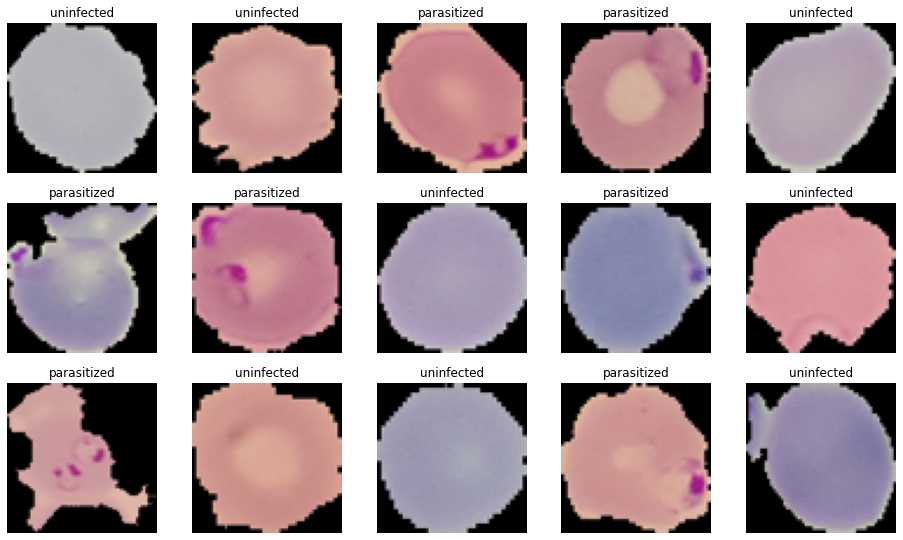

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 16):

    plt.subplot(5, 5, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

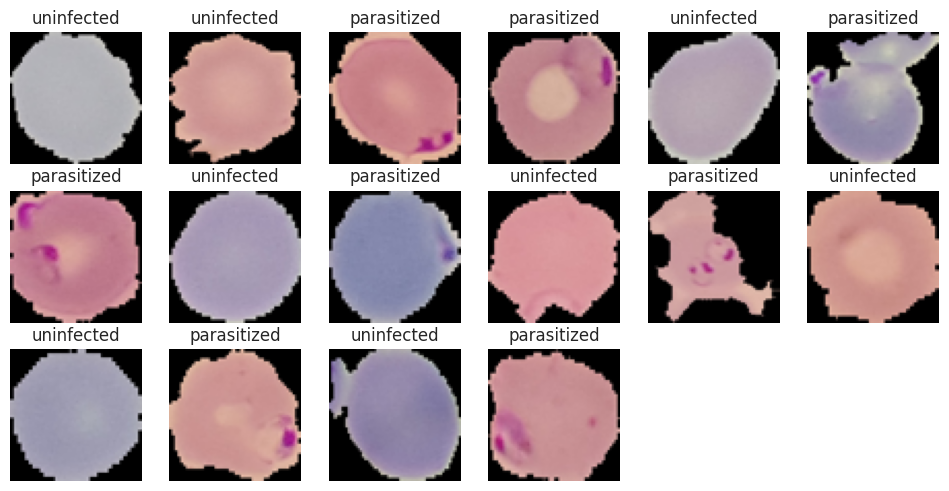

In [41]:
# Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

# Visualizing both the parasitized and uninfected images

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 17):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


**Observations and Insights**
Parasitized blood cells have visiblly red marks on any side of the image while uninfected images are clear with no marks.

In [42]:
# Plotting the mean images for parasitized and uninfected

# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img




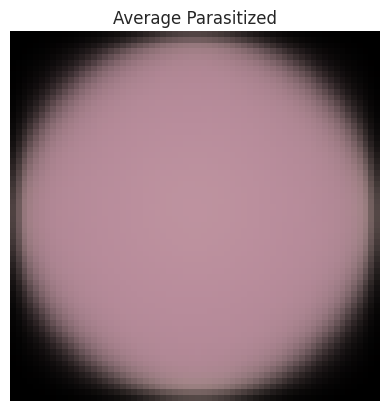

In [43]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

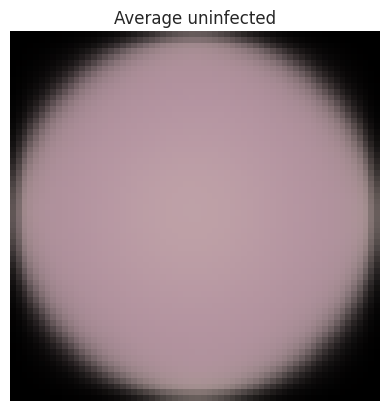

In [44]:
# Mean image for uninfected


# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected.

uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')   # find the mean



In [45]:
#Converting RGB to HSV of Images using OpenCV

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)


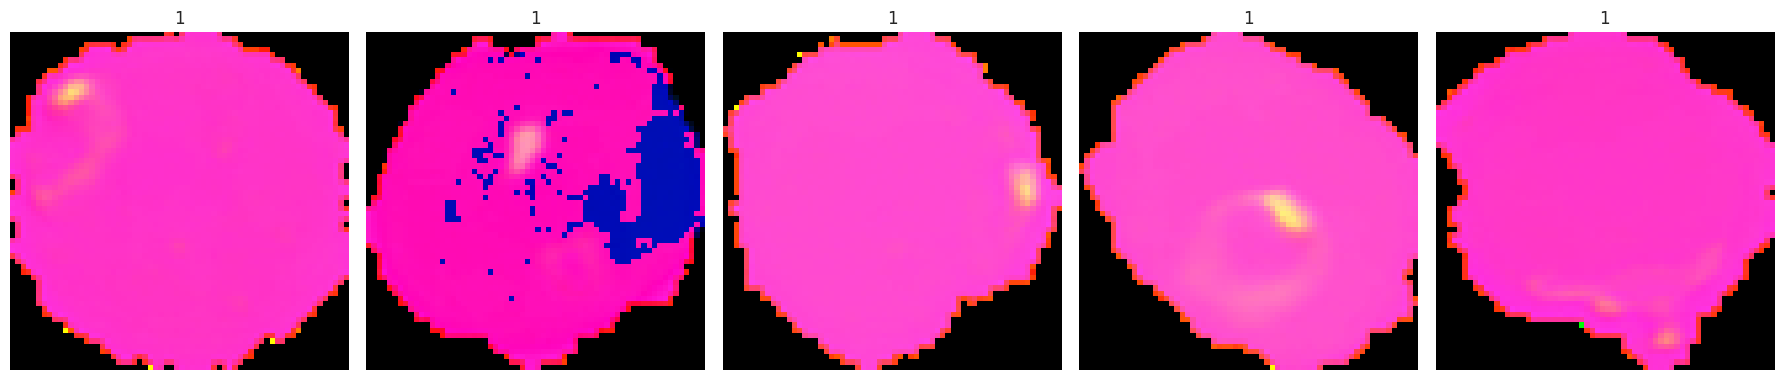

In [46]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

In [47]:
# Converting the test data

# Test Data

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

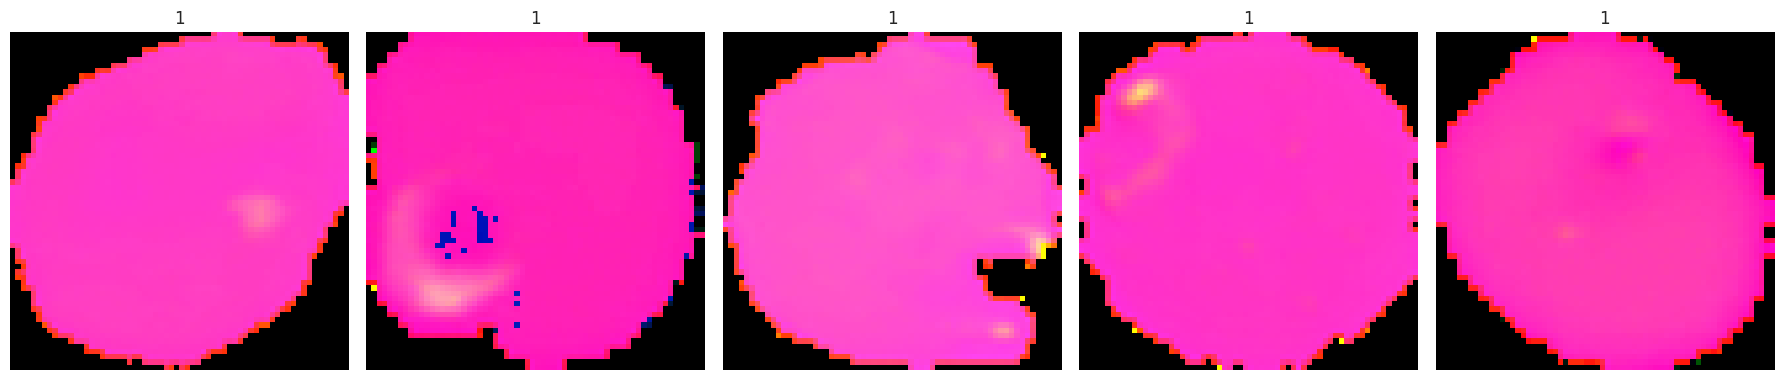

In [50]:
# Visualize Test Data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

**Observations and Insight**
Both train and test images display a considerable number of parasitized images.Widely infected blood cells have a spread of the virus across the blood cell as displayed in blue and yellow markers.

In [52]:
#Processing Images using Gaussian Blurring

gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)


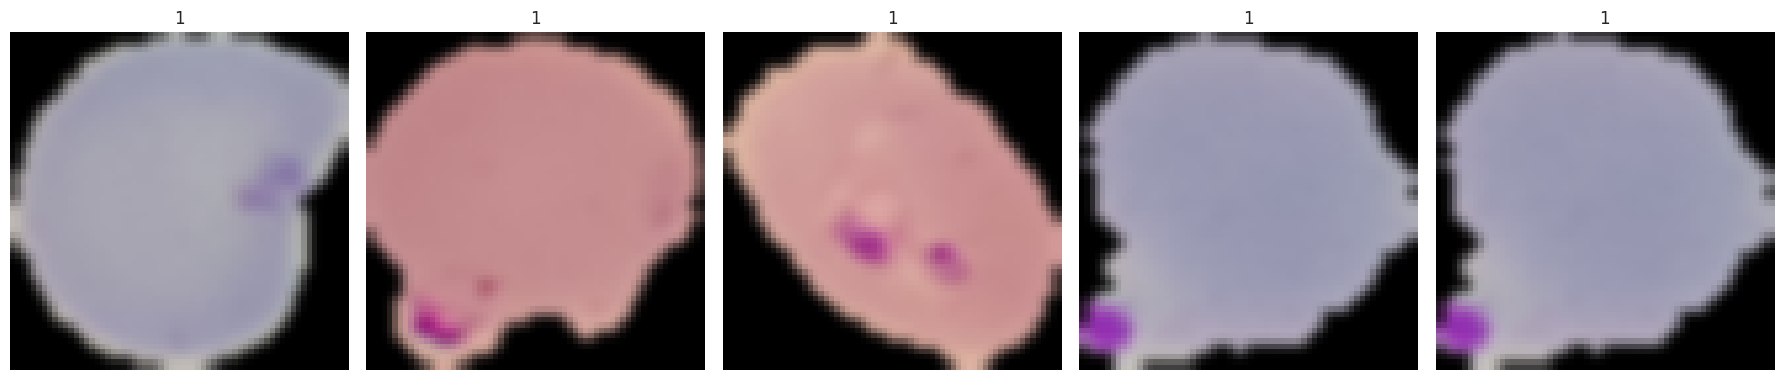

In [53]:
# Visualizing

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

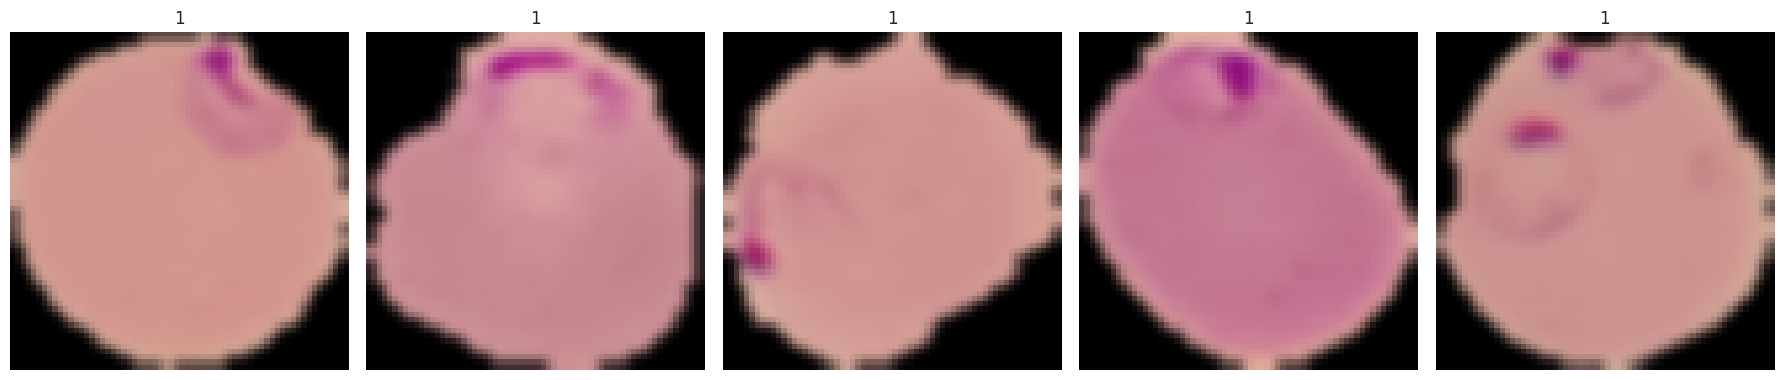

In [56]:

# Gaussian Blurring on test data

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

**Observations and Insights**

The blurred images helps to capture parasite spread with less background noise. This helps the model to focus on the attributes/inputs that directly influence the model in real life situations. In this case, the model would focus on the parasitic attributes that will allow it to predict any unseen image by focusing the generalized model during training.

**Proposed approach**
The implementation approach for this model will include data-preprocessing to ensure that we are able feed the input into the model to predict Parasitic and uninfected people.

After rescaling the train and test data, a first step will be to appy data augmentation techniques to enhance image cell dataet.

The dataset will then be split into train and validation datasets to be used to run a CNN model. To successfuly identify malaria parasites, several techniques will be used including dropout methods, relu activation functions.

The next step will involve assessing the model performance by using techniques such as binary_crossentropy loss function', ADAM optimizer and accuracy.

Based on the outlined techniques, the projected accuracy level to detect parasites microscopic images will be over 90%.

